<a href="https://colab.research.google.com/github/turabrasool/Machine-Learnng/blob/main/multipleRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

optimized theta without nomal equation X0    340410.918973
X1    110308.113371
X2     -6326.538108
dtype: float64
0    340412.659574
1    110631.050279
2     -6649.474271
dtype: float64


array([-9.59060761e+23])

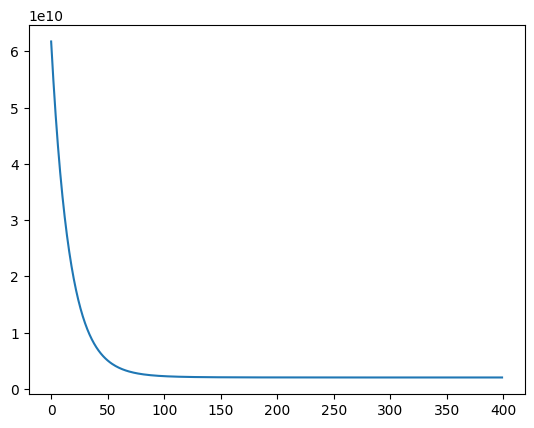

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('ex1data2.txt',header=None)

df.columns = ['X1','X2','y']
X = df[['X1','X2']]
y = df['y']
m = len(y)

mu = X.mean()
sigma = X.std()


# This will return the numpy array with normalized features
def feature_normalize(X):
    X_normalized = (X - X.mean()) / X.std()
    return X_normalized


# This function will calculate cost function and return the value
def cost_function(X,y,theta):
    m = len(y)
    J = (1 / (2 * m)) * np.sum((X @ theta - y) ** 2)
    return J



# X = df.loc[:, df.columns!='price']
# y = df['price']
m = len(y)
X = feature_normalize(X)
X.insert(0,'X0',np.ones(m))
theta = np.zeros(len(X.columns))
cost_function(X,y,theta)

# This function will find the gradient_descent and return final optimized theta value
# and all the history of different cost function
def gradient_descent(X,y,theta,alpha,iterations):
    m = len(y)
    hist = np.zeros(iterations)

    for iteration in range(iterations):
        error = X @ theta - y
        gradient = (1 / m) * (X.T @ error)
        theta = theta - alpha * gradient
        hist[iteration] = cost_function(X, y, theta)

    return hist, theta



# This will calculate the optimized theta value through Normal equation
def normal_equation(X,y):
    theta_opt = np.linalg.inv(X.T @ X) @ X.T @ y
    return theta_opt



alpha = 0.03

hist,theta_opt = gradient_descent(X,y,theta,alpha,400)

plt.plot(hist)

print('optimized theta without nomal equation',theta_opt)
theta_opt=normal_equation(X,y)
print(normal_equation(X,y))

# 2104,3,399900
# 1600,3,329900
# 2400,3,369000
# 1416,2,232000
# 3000,4,539900
# 1985,4,299900
# 1534,3,314900
def predict(ary,theta):
    pred = pd.DataFrame(np.array(ary))
    pred = feature_normalize(pred.T)
    ary0 = np.ones(1,dtype=int)
    ary1 = np.array(pred,dtype=int)
    pred = np.column_stack([ary0,ary1])

    return pred@np.array(theta_opt.T)

predict(np.array([1534,3]),theta_opt)
